In [4]:
# Simple package imports (nothing magic!)
import numpy as np
import matplotlib.pyplot as plt

# Global config.
np.set_printoptions(precision=3)
np.random.seed(1234)

# Helper constants.
_S_TO_MS = 1000.0

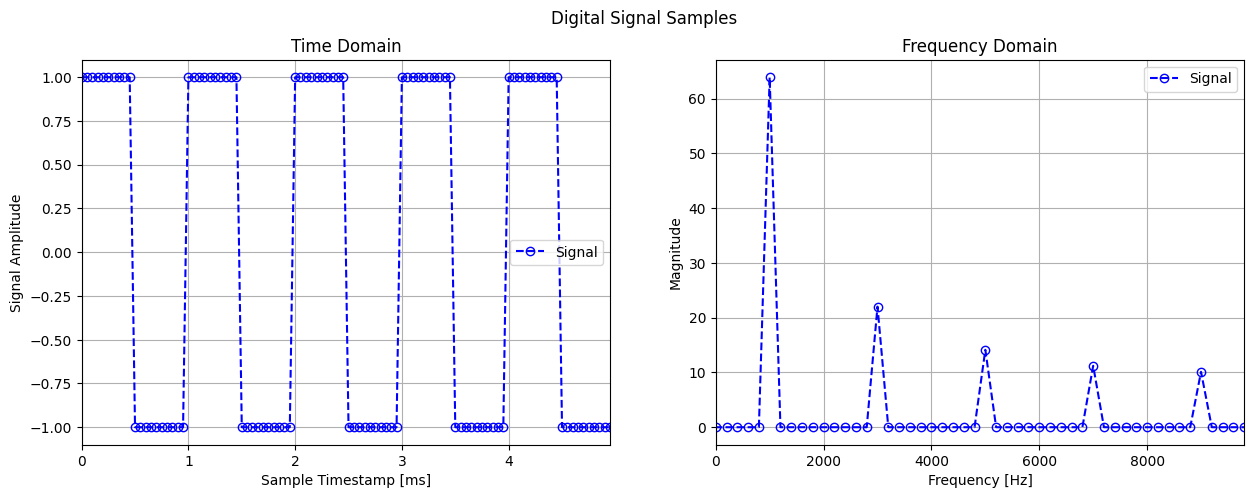

In [5]:
# Define input signal properties.
signal_period = 1 / (1000.0)  # Period of one square wave cycle.
number_of_cycles = 5  # number of wave cycles to sample.
oversampling_factor = 20.0  # sampled @ factor higher than signal frequency.

# Generate signal timestamps.
signal_timestamps, signal_timestep = np.linspace(
    0,
    signal_period * number_of_cycles,
    int(oversampling_factor * number_of_cycles),
    endpoint=False,
    retstep=True,
    dtype=float,
)

# Generate signal samples. 📌[EXERCISE: Try replace this signal with any function of time ...]
signal_samples = np.sign(
    np.sin(2 * np.pi / signal_period * (signal_timestamps + signal_timestep / 2))
)  # Square Wave.
# signal_samples = np.sin(2 * np.pi / signal_period * (signal_timestamps + signal_timestep/2)) # Sine Wave.

# Compute FFT of the signal.
signal_frequencies = np.fft.fftshift(
    np.fft.fftfreq(n=len(signal_timestamps), d=signal_timestep)
)
signal_fft_magnitudes = np.fft.fftshift(np.abs(np.fft.fft(signal_samples)))

# ==============================
#  Visualize Input Signal
# ==============================

plt.figure(
    figsize=(15, 5),
).suptitle("Digital Signal Samples")

# Plot signal in time domain.
ax = plt.gcf().add_subplot(1, 2, 1)
ax.set(
    title="Time Domain",
    ylabel="Signal Amplitude",  # '$|H(\omega)|$'
    xlabel="Sample Timestamp [ms]",
)
ax.plot(
    signal_timestamps * _S_TO_MS,
    signal_samples,
    label="Signal",
    linestyle="--",
    marker="o",
    markerfacecolor="None",
    color="blue",
)

plt.legend()
plt.autoscale(tight=True, axis="x")
plt.grid(True)

# Plot signal in Frequency Domain.
ax = plt.gcf().add_subplot(1, 2, 2)
ax.set(
    title="Frequency Domain",
    ylabel="Magnitude",
    xlabel="Frequency [Hz]",
)
ax.plot(
    signal_frequencies,
    signal_fft_magnitudes,
    label="Signal",
    linestyle="--",
    marker="o",
    markerfacecolor="None",
    color="blue",
)

plt.legend()
plt.autoscale(tight=True, axis="x")
ax.set_xlim(0)
plt.grid(True)

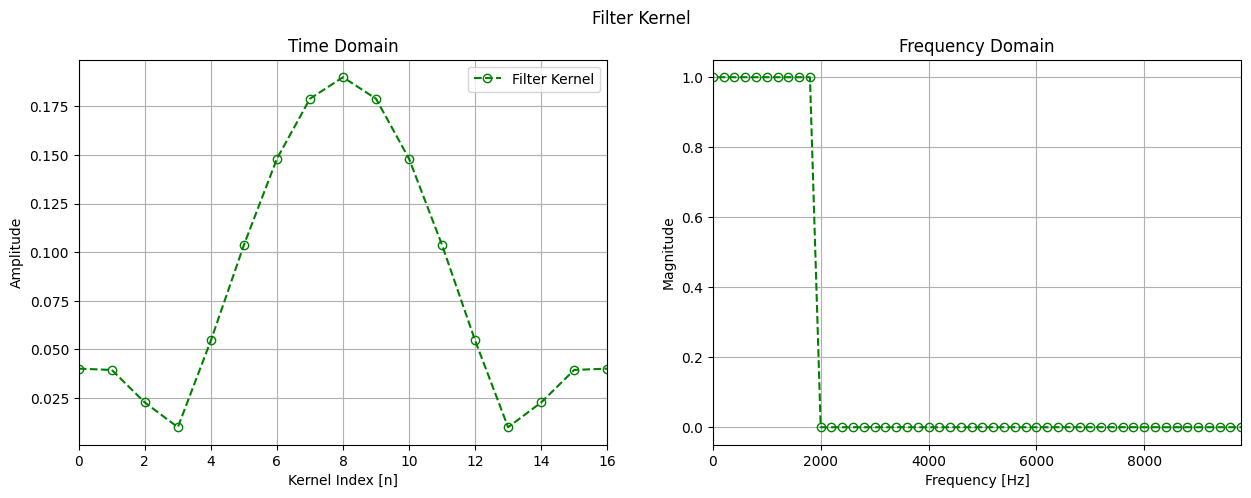

In [ ]:
# Assign a desired upper/lower cutoff frequency for a filter.
passband_lower_cutoff_frequency = 0
passband_upper_cutoff_frequency = 2000
kernel_window_size = 16

# Design a digital filter by directly generating the desired frequency domain response magnitude values.
filter_fft_magnitudes = np.where(
    (np.abs(signal_frequencies) >= passband_lower_cutoff_frequency)
    & (np.abs(signal_frequencies) < passband_upper_cutoff_frequency),
    1.0,
    0.0,
)

# Use the inverse FFT to convert our desired frequency response back to the time domain 'filter kernel'
# (we will later be able to convolve this with our time domain samples to achieve the filtering).
filter_kernel = np.abs(np.fft.ifftshift(np.fft.ifft(filter_fft_magnitudes)))

# Truncate to center taps.
truncated_filter_kernel = filter_kernel[
    int(len(filter_kernel) / 2 - kernel_window_size / 2) : int(
        len(filter_kernel) / 2 + kernel_window_size / 2
    )
    + 1
]

# ==============================
#  Visualize Filter Kernel
# ==============================

plt.figure(
    figsize=(15, 5),
).suptitle("Filter Kernel")

# Plot Filter kernel.
ax = plt.gcf().add_subplot(1, 2, 1)
ax.set(
    title="Time Domain",
    ylabel="Amplitude",  
    xlabel="Kernel Index [n]",
)
ax.plot(
    truncated_filter_kernel,
    label="Filter Kernel",
    linestyle="--",
    marker="o",
    markerfacecolor="None",
    color="green",
)

plt.legend()
plt.autoscale(tight=True, axis="x")
plt.grid(True)

# Plot Filter Kernel in Frequency Domain.
ax = plt.gcf().add_subplot(1, 2, 2)
ax.set(
    title="Frequency Domain",
    ylabel="Magnitude",
    xlabel="Frequency [Hz]",
)
ax.plot(
    signal_frequencies,
    filter_fft_magnitudes / filter_fft_magnitudes.max(),
    linestyle="--",
    marker="o",
    markerfacecolor="None",
    color="green",
)

plt.autoscale(tight=True, axis="x")
ax.set_xlim(0)
plt.grid(True)

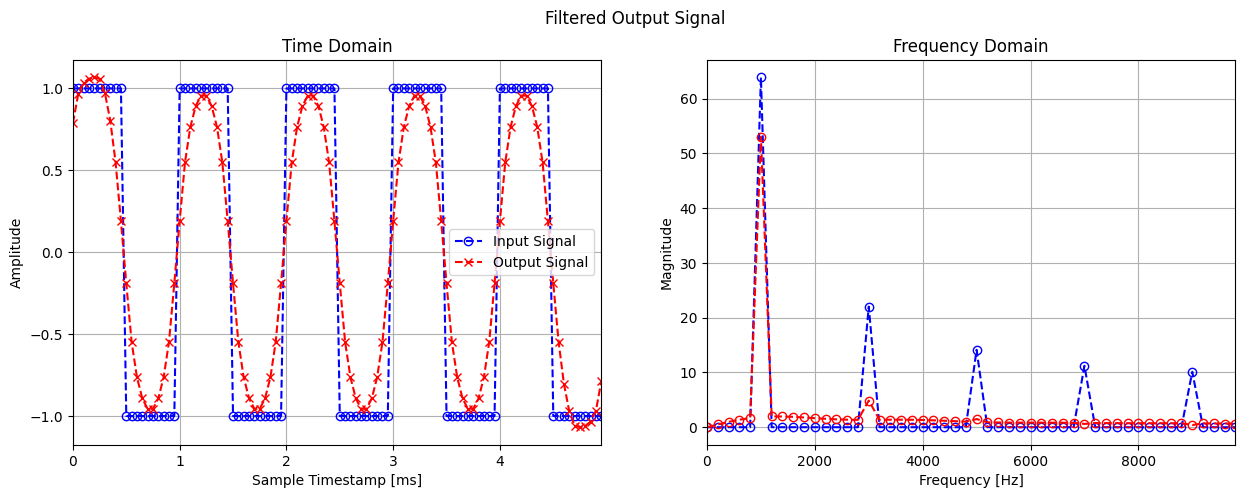

In [ ]:
# Perform 1D convolution.
output_signal = np.convolve(truncated_filter_kernel, signal_samples, mode="same")

# Compute the FFT of the output signal.
output_fft_magnitudes = np.fft.fftshift(np.abs(np.fft.fft(output_signal)))

# ==============================
#  Visualize Output Signal
# ==============================

plt.figure(
    figsize=(15, 5),
).suptitle("Filtered Output Signal Comparison")

# Plot Filter kernel.
ax = plt.gcf().add_subplot(1, 2, 1)
ax.set(
    title="Time Domain",
    ylabel="Amplitude",  # '$|H(\omega)|$'
    xlabel="Sample Timestamp [ms]",
)

ax.plot(
    signal_timestamps * _S_TO_MS,
    signal_samples,
    label="Input Signal",
    linestyle="--",
    marker="o",
    markerfacecolor="None",
    color="blue",
)

ax.plot(
    signal_timestamps * _S_TO_MS,
    output_signal,
    label="Output Signal",
    linestyle="--",
    marker="x",
    markerfacecolor="None",
    color="red",
)

plt.legend()
plt.autoscale(tight=True, axis="x")
plt.grid(True)

# Plot signal in Frequency Domain.
ax = plt.gcf().add_subplot(1, 2, 2)
ax.set(
    title="Frequency Domain",
    ylabel="Magnitude",
    xlabel="Frequency [Hz]",
)
ax.plot(
    signal_frequencies,
    signal_fft_magnitudes,
    label="Input Signal",
    linestyle="--",
    marker="o",
    markerfacecolor="None",
    color="blue",
)

ax.plot(
    signal_frequencies,
    output_fft_magnitudes,
    label="Output Signal",
    linestyle="--",
    marker="o",
    markerfacecolor="None",
    color="red",
)

plt.autoscale(tight=True, axis="x")
ax.set_xlim(0)
plt.grid(True)